In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings ("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/SDSS - Project/sdss_100k_galaxy_form_burst.csv', header=1)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


# Handling Missing Values

In [5]:
df.shape

(100000, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [7]:
df.isnull().sum()

,0
objid,0
specobjid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
modelFlux_u,0


In [8]:
df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)

# Descriptive statistical

In [9]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


# Univariate analysis

In [10]:
sub=df["subclass"].value_counts()
sub

,count
subclass,
0,74993
1,25007


array([<Axes: ylabel='count'>], dtype=object)

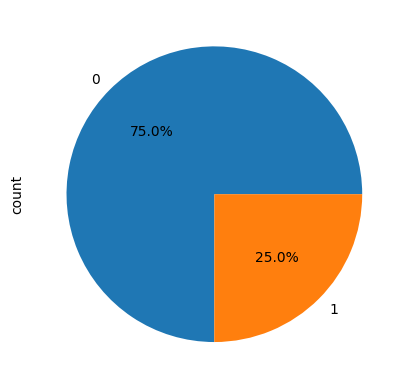

In [11]:
sub.plot(kind="pie", subplots=True, autopct="%1.1f%%")

In [12]:
def func(col):
  sns.boxplot(x='subclass', y=col, data=df)
  plt.show()

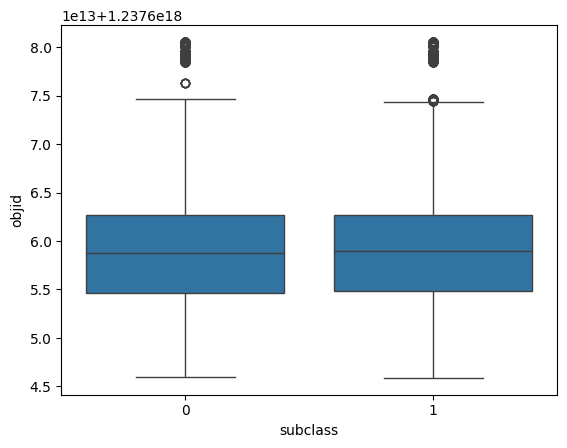

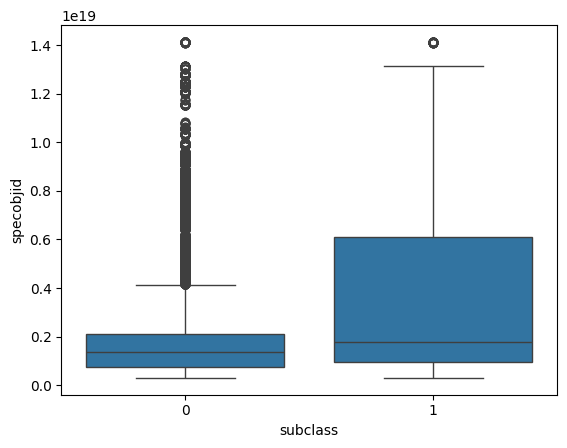

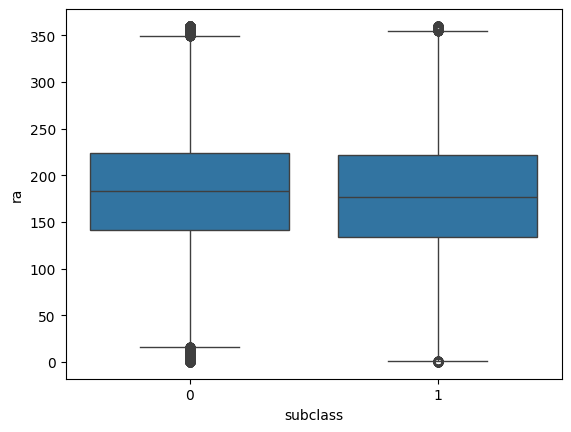

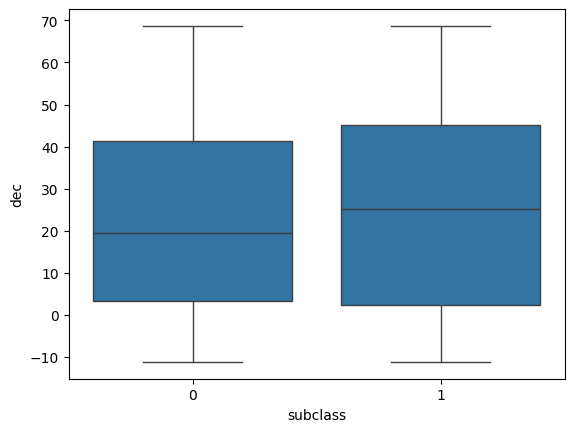

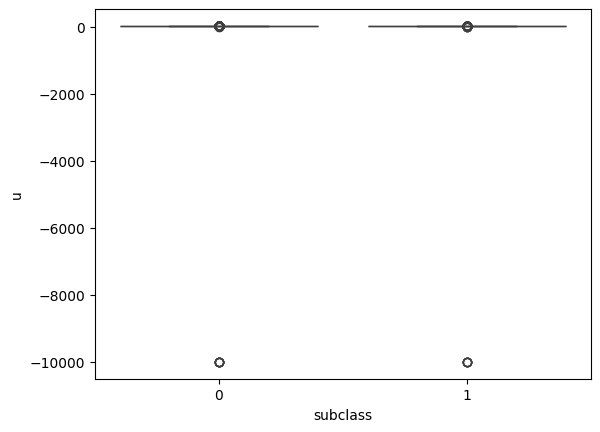

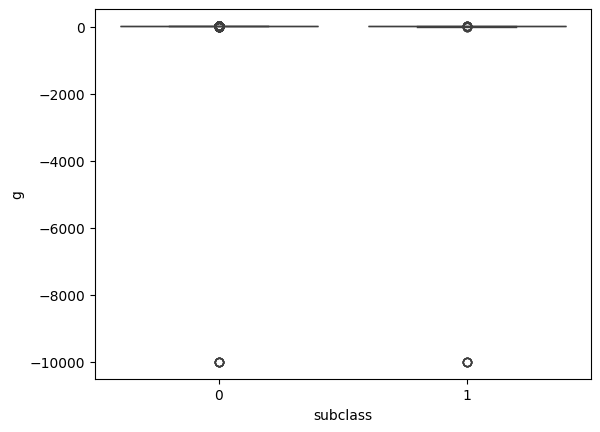

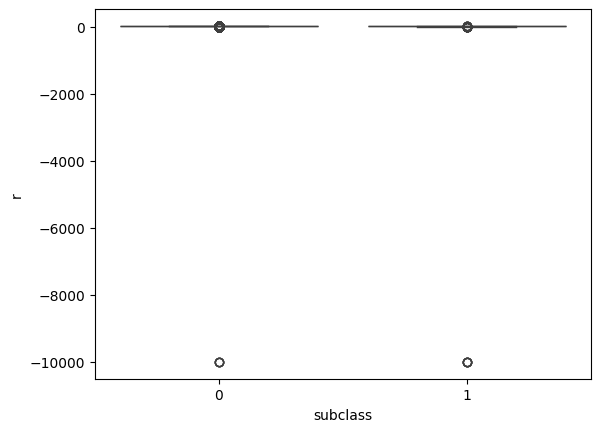

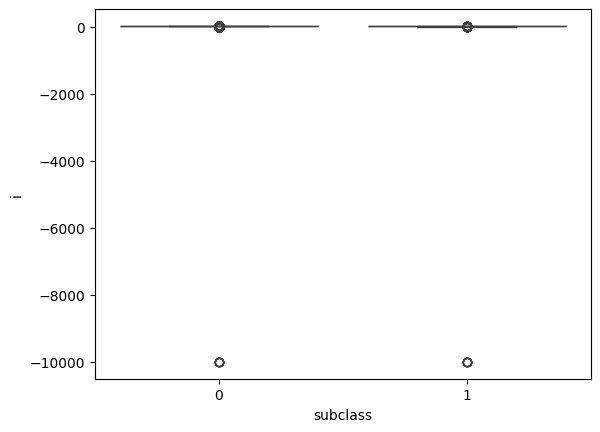

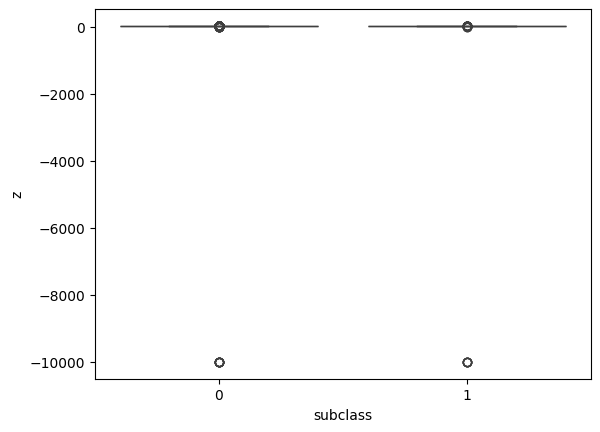

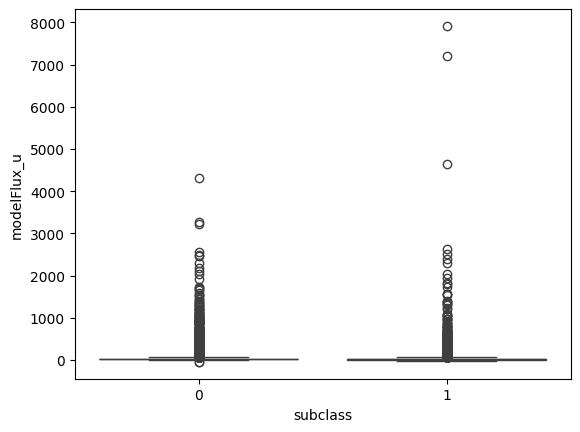

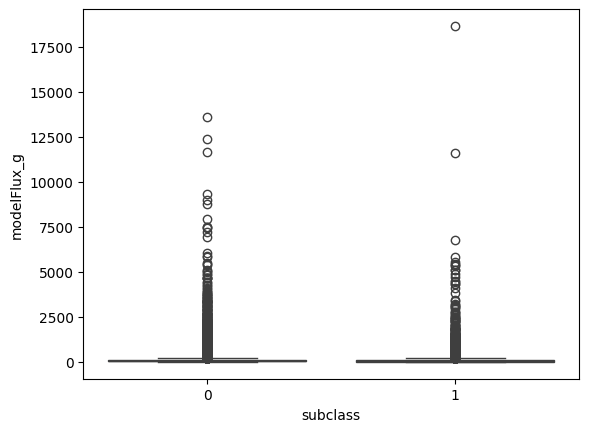

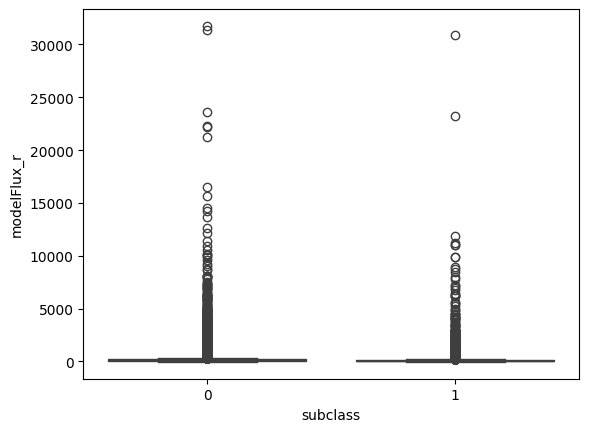

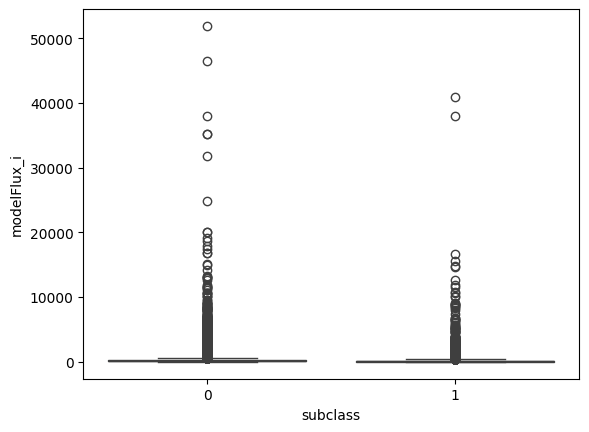

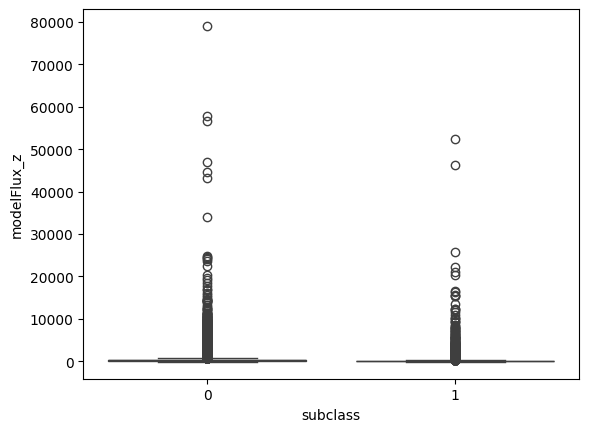

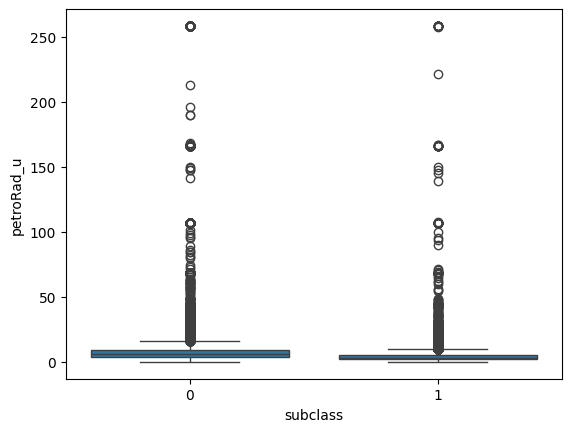

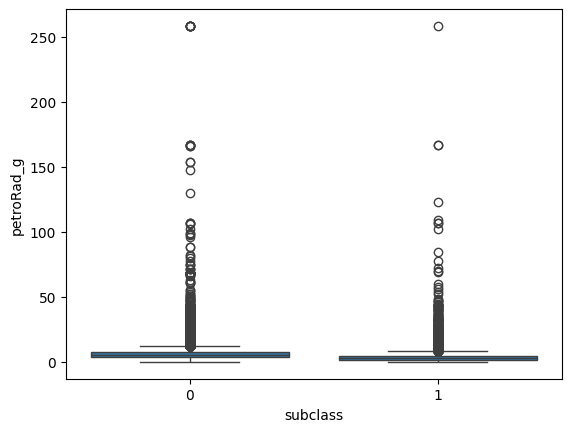

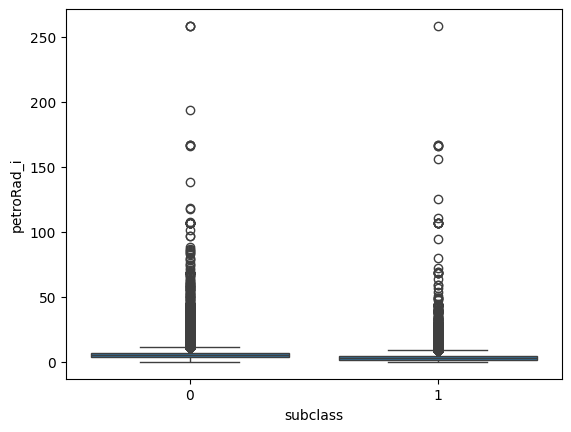

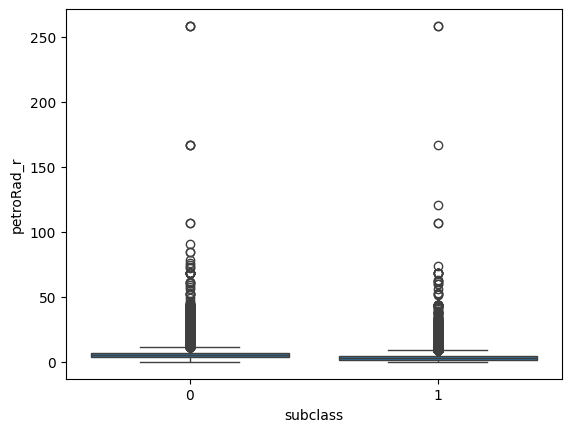

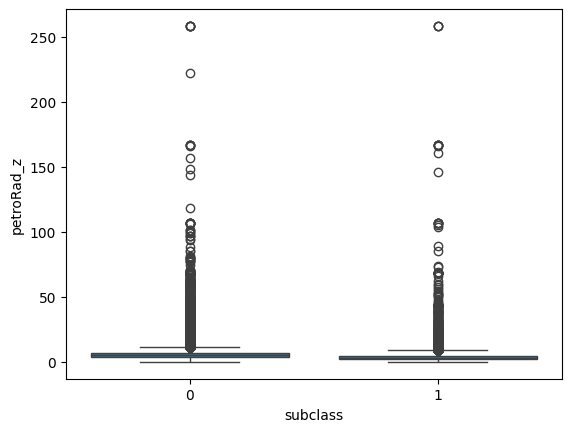

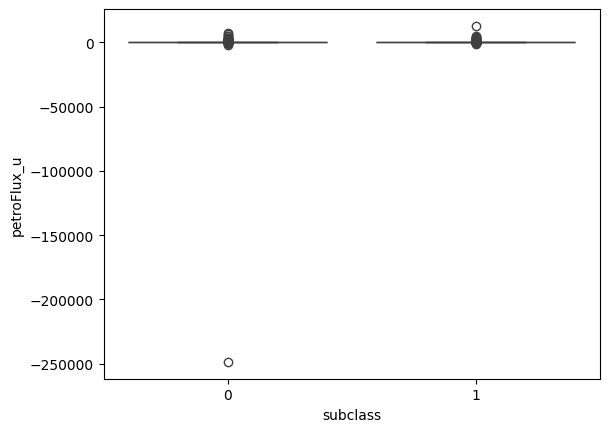

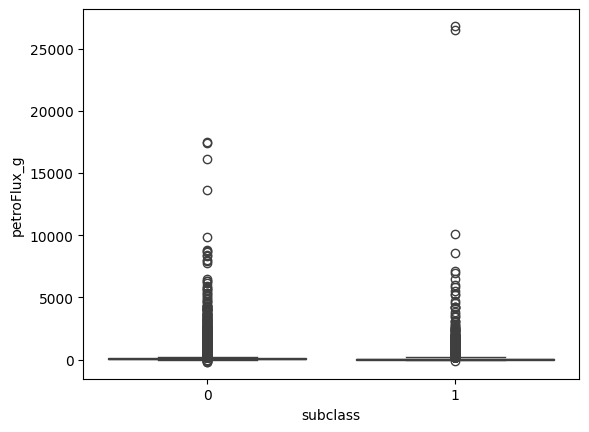

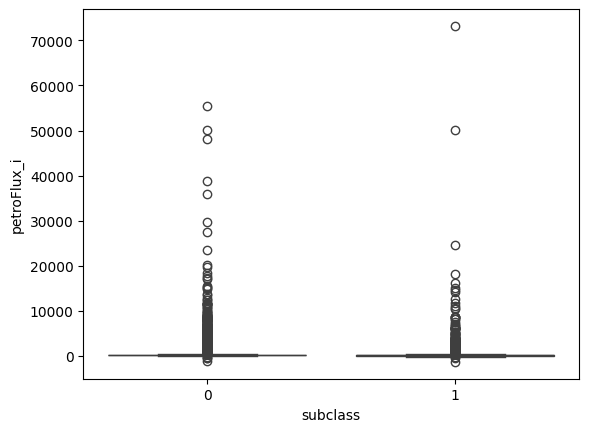

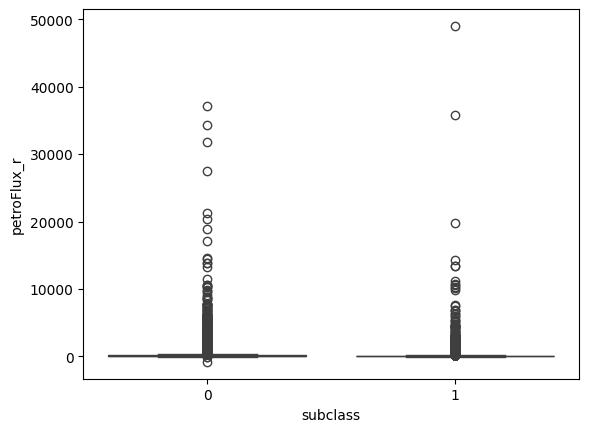

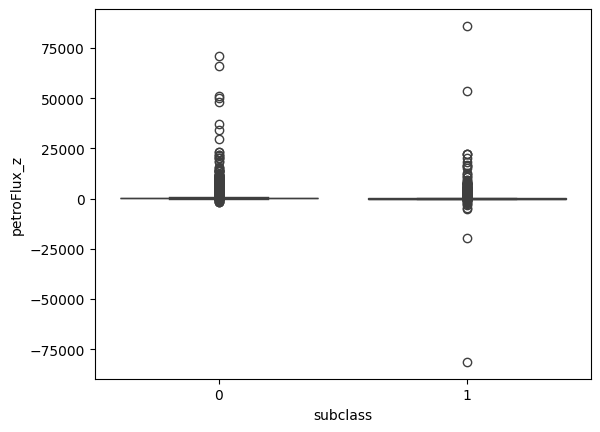

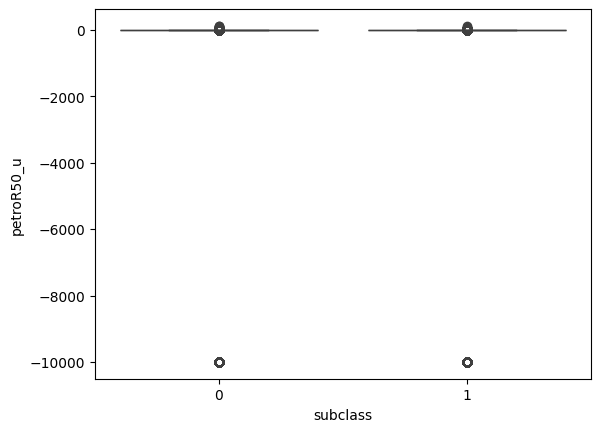

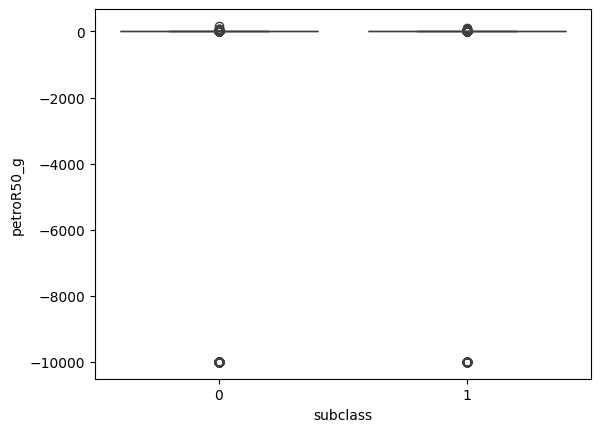

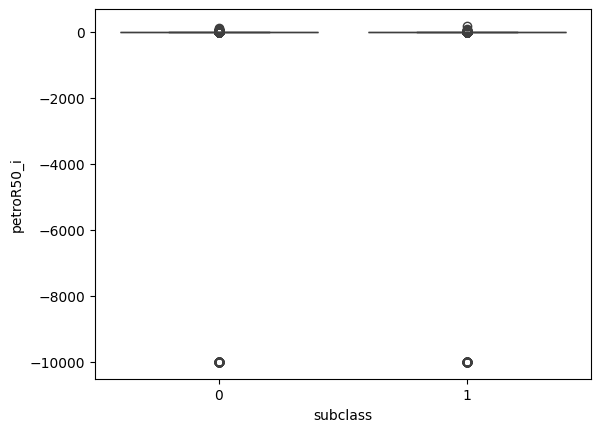

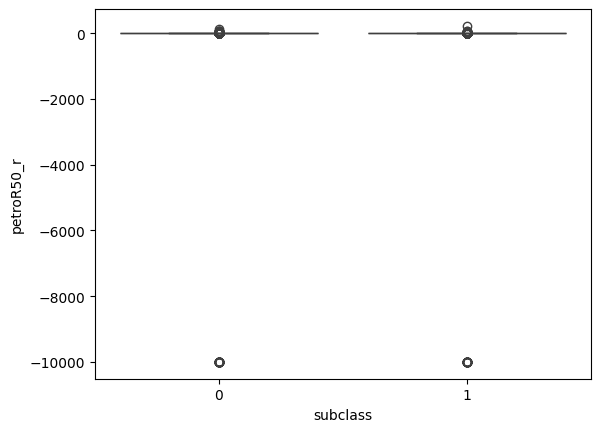

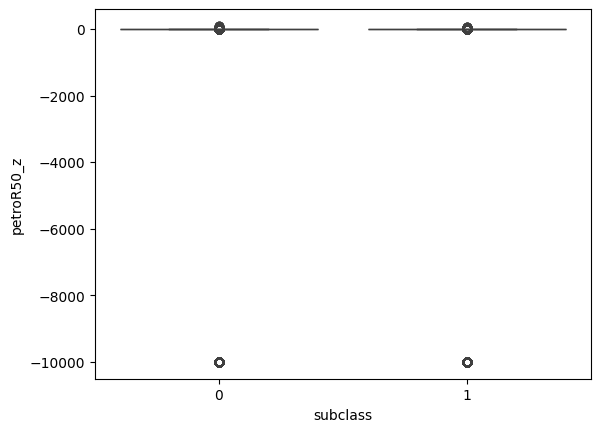

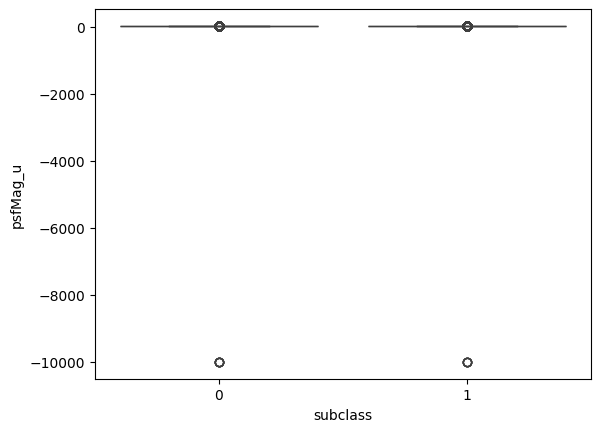

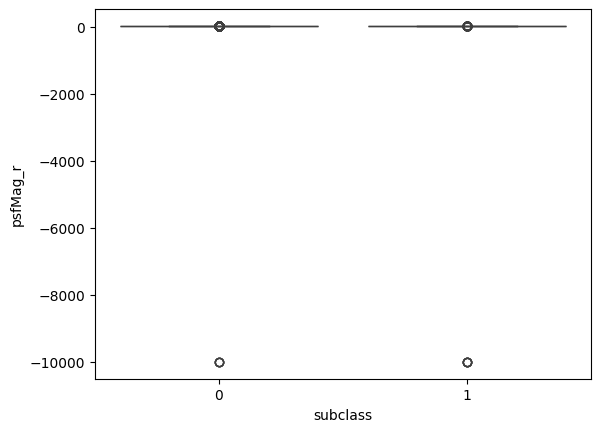

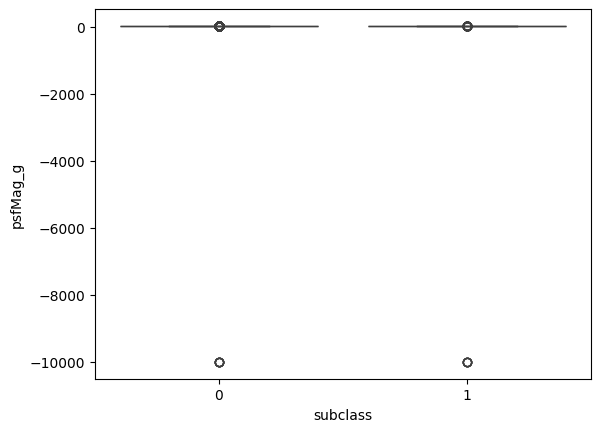

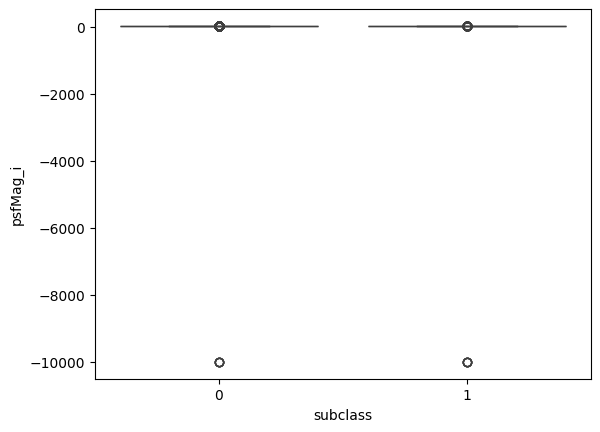

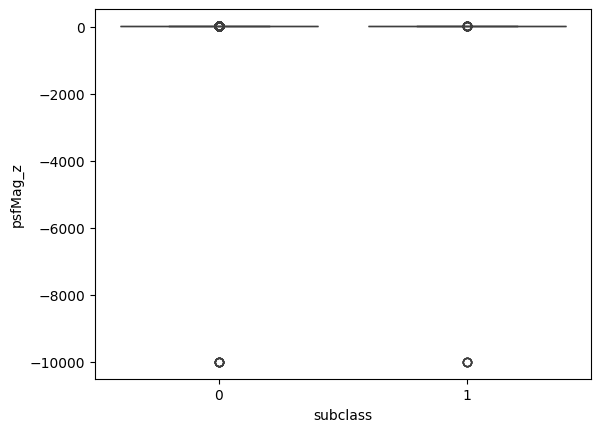

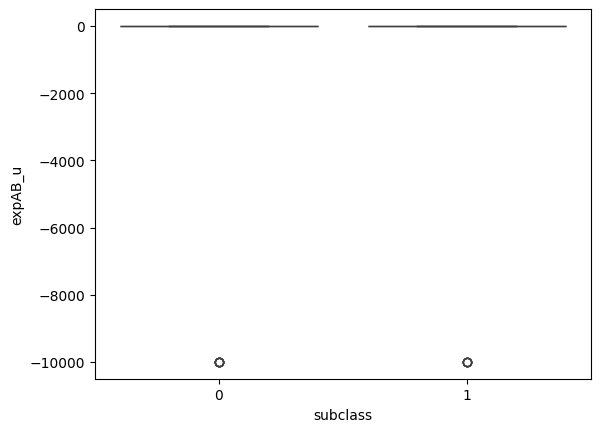

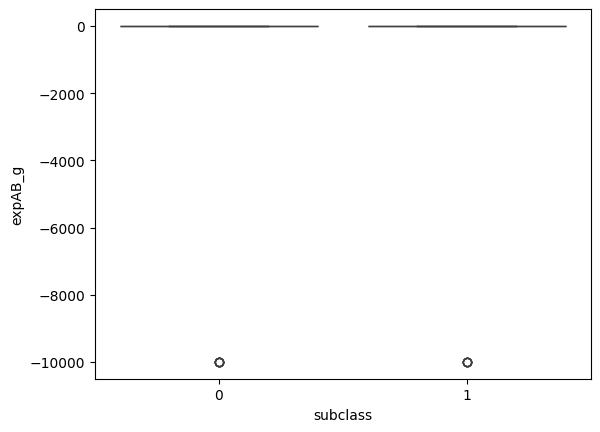

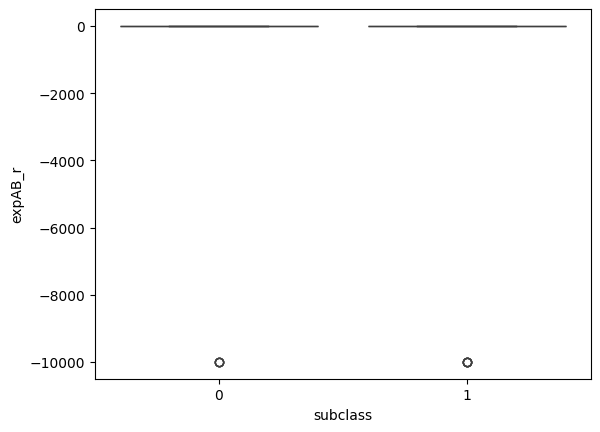

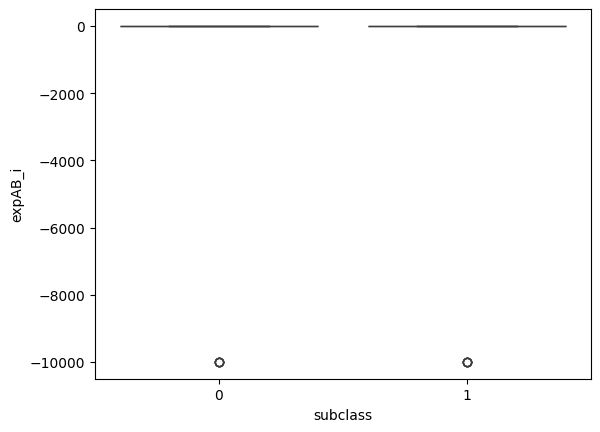

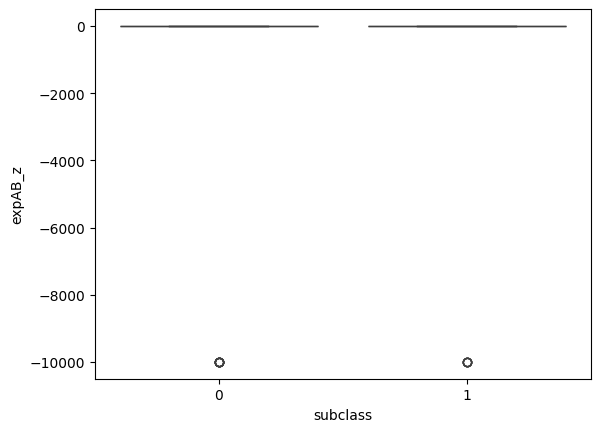

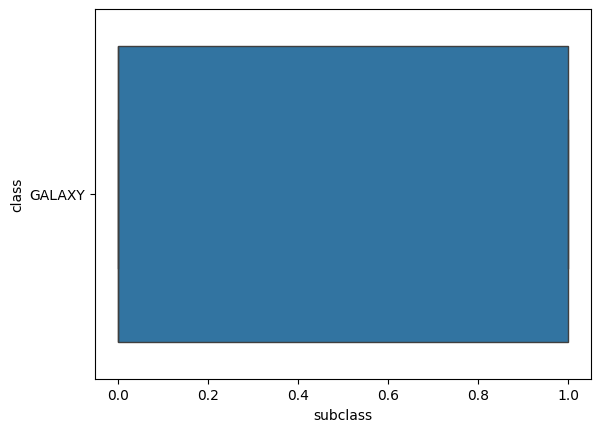

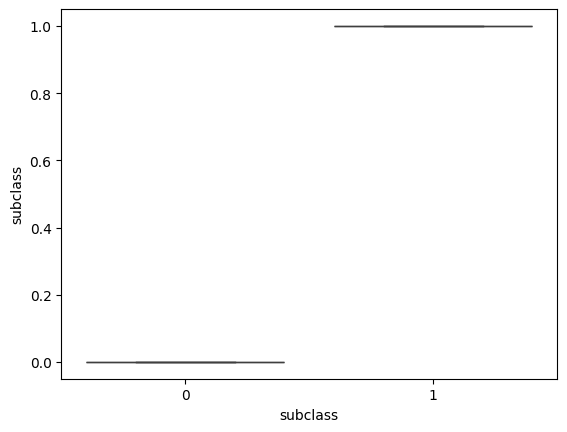

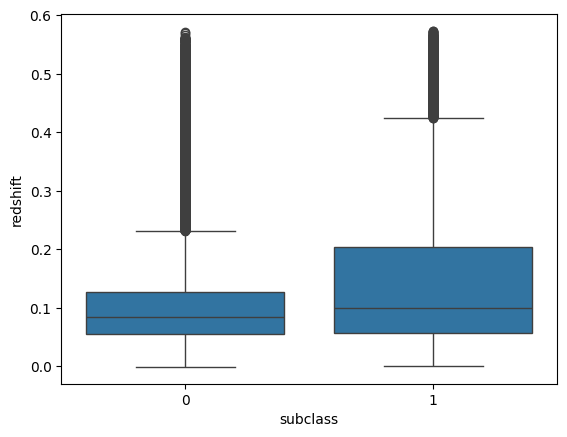

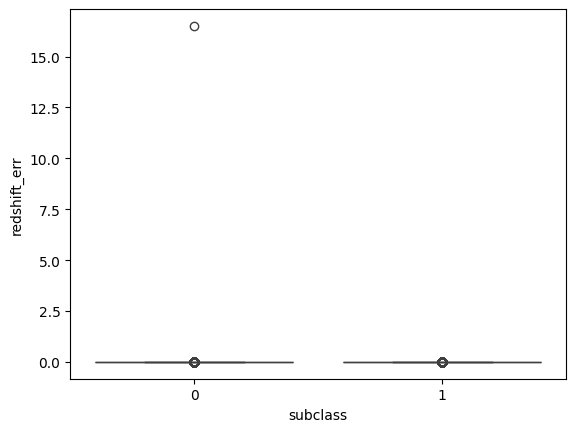

In [13]:
for i in df.columns:
  func(i)

# Bivariate analysis

<Axes: xlabel='subclass', ylabel='i'>

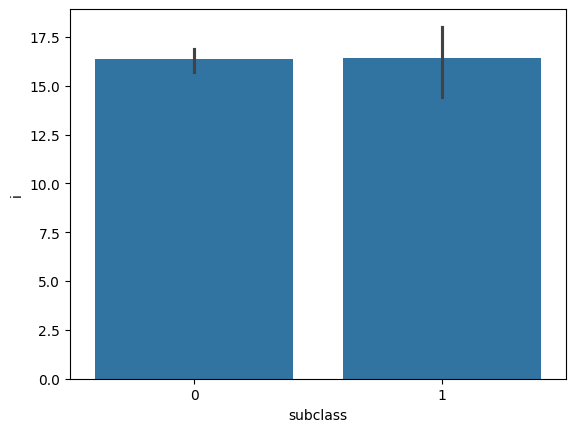

In [14]:
sns.barplot(x='subclass', y='i', data=df)

<Axes: xlabel='subclass', ylabel='z'>

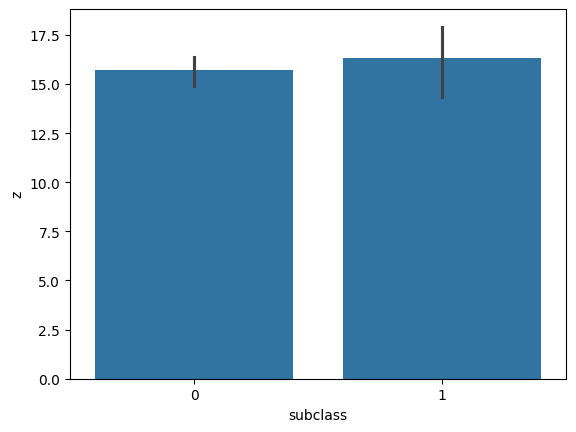

In [15]:
sns.barplot(x='subclass', y='z', data=df)

<Axes: xlabel='subclass', ylabel='u'>

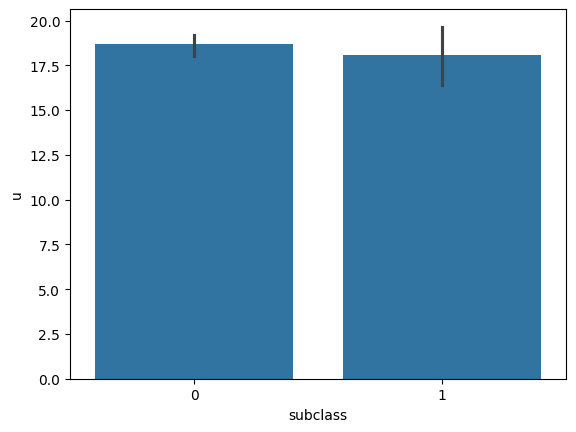

In [16]:
sns.barplot(x='subclass', y='u', data=df)

# Multivariate analysis

In [ ]:
plt.figure(figsize=(30,22))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

# Handling the outliers

In [ ]:
quant=df['u'].quantile([0.25,0.75])
print("quant:", quant)
print("")
Q3=quant.loc[0.75]
print("Q3:", Q3)
Q1=quant.loc[0.25]
print("Q1:", Q1)
IQR=Q3-Q1
print("IQR", IQR)
maxwhisker=Q3+1.5*IQR
print("maxwhisker:", maxwhisker)
minwhisker=Q1-1.5*IQR
print("minwhisker:", minwhisker)

In [ ]:
df['u']=np.where(df['u']>20.31657947, 20.11657947, df['u'])
df['u']=np.where(df['u']<18.87221499, 18.77221499, df['u'])


In [ ]:
sns.boxplot(y='u',data=df)

# Selecting best Features using Select K Best


In [ ]:
x = df.drop(['subclass',], axis=1)
y = df['subclass']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

x_encoded = x.copy()

for col in x_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x_encoded[col].astype(str))

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x_encoded, y)

selected_features = x_encoded.columns[selector.get_support()]
print("Selected features:", list(selected_features))

x_selected = x_encoded[selected_features]

# Balancing Value Counts using Smote


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# -------------------------------
# 1. Selected Features (Numeric)
# -------------------------------
selected_features = [
    'u', 'modelFlux_i', 'modelFlux_z',
    'petroRad_u', 'petroRad_g', 'petroRad_i',
    'petroRad_r', 'petroRad_z', 'redshift'
]

X = df[selected_features].copy()

# -------------------------------
# 2. Encode Target (subclass)
# -------------------------------
le = LabelEncoder()
y = le.fit_transform(df['subclass'])

# Optional: Check what encoding is applied
print("\nLabel Mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original} → {encoded}")

# -------------------------------
# 3. Apply SMOTE
# -------------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# -------------------------------
# 4. Check new class distribution
# -------------------------------
print("\nClass Balance After SMOTE:")
value_counts = pd.Series(y_resampled).value_counts()
print(value_counts)

# Optional: Show balanced counts with labels
print("\nBalanced Class Labels:")
print({le.inverse_transform([k])[0]: v for k, v in value_counts.items()})

# Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled   # keeps class balance in train & test
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Scaling the feature variables using standardscaler method

In [ ]:
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Model building

Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(x_train_scaled, y_train)
y_pred = clf.predict(x_test_scaled)
report = classification_report(y_test, y_pred)
print("Classification Report:\n",report)
print("")
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)


Logistic Regression:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()
log=lg.fit(x_train_scaled, y_train)
y_pred=log.predict(x_test_scaled)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("")
report = classification_report(y_test, y_pred)
print("Classification Report:\n",report)
print("")
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)

Confusion Matrix: [[10582  4417]
 [ 2601 12398]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75     14999
           1       0.74      0.83      0.78     14999

    accuracy                           0.77     29998
   macro avg       0.77      0.77      0.77     29998
weighted avg       0.77      0.77      0.77     29998


accuracy 0.7660510700713381


Random Forest Classifier:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# ----------------------------------------------------
# 1. Select 10 Numerical Features
# ----------------------------------------------------
selected = [
    'u','modelFlux_i','modelFlux_z',
    'petroRad_u','petroRad_g','petroRad_i',
    'petroRad_r','petroRad_z','redshift'
]

X = df[selected].copy()    # All numeric
y_raw = df['subclass'].copy()  # Target labels

# ----------------------------------------------------
# 2. Encode Target Labels
# ----------------------------------------------------
le = LabelEncoder()
y = le.fit_transform(y_raw)

# FIX: Ensure all class names are strings for classification_report
target_names = [str(c) for c in le.classes_]

# ----------------------------------------------------
# 3. Train-Test Split
# ----------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

# ----------------------------------------------------
# 4. Standard Scaling
# ----------------------------------------------------
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ----------------------------------------------------
# 5. Train Random Forest
# ----------------------------------------------------
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train_scaled, y_train)

# ----------------------------------------------------
# 6. Predictions
# ----------------------------------------------------
y_pred_train = rf.predict(x_train_scaled)
y_pred_test = rf.predict(x_test_scaled)

# ----------------------------------------------------
# 7. Evaluation
# ----------------------------------------------------
print("\nConfusion Matrix (Train)")
print(confusion_matrix(y_train, y_pred_train))

print("\nConfusion Matrix (Test)")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Train)")
print(classification_report(y_train, y_pred_train, target_names=target_names))

print("\nClassification Report (Test)")
print(classification_report(y_test, y_pred_test, target_names=target_names))

print("\nTrain Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))



Confusion Matrix (Train)
[[59977     1]
 [    1 20021]]

Confusion Matrix (Test)
[[14024   991]
 [ 1893  3092]]

Classification Report (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59978
           1       1.00      1.00      1.00     20022

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Classification Report (Test)
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     15015
           1       0.76      0.62      0.68      4985

    accuracy                           0.86     20000
   macro avg       0.82      0.78      0.79     20000
weighted avg       0.85      0.86      0.85     20000


Train Accuracy: 0.999975
Test Accuracy: 0.8558


# Save the Model

In [ ]:
import pickle

MODEL_PATH = '/content/drive/MyDrive/SDSS - Project/RF.pkl'

with open(MODEL_PATH, 'wb') as f:
    pickle.dump(rf, f)

print("Model saved successfully at:", MODEL_PATH)


In [31]:
import pickle

MODEL_PATH = '/content/drive/MyDrive/SDSS - Project/scaler.pkl'

with open(MODEL_PATH, 'wb') as f:
    pickle.dump(rf, f)

print("scaler saved successfully at:", MODEL_PATH)

scaler saved successfully at: /content/drive/MyDrive/SDSS - Project/scaler.pkl


In [32]:
import pickle
pickle.dump(rf, open('RF.pkl', 'wb'))

Test the model

In [33]:
label_map = {
    0: "STARFORMING",
    1: "STARBURST"
}

In [34]:
test_cases = np.array([
    [
    20.22238,
    242.1565,
    383.088,
    4.341394,
    5.839918,
    6.277738,
    6.363106,
    5.760541,
    0.1269667
],
    [
    19.11166,
    98.18628,
    107.5424,
    3.079922,
    3.183267,
    3.318907,
    3.318346,
    3.510052,
    0.05520416
],
    [
     17.6484,
     277.5656,
     290.1809,
     2.244234,
     4.252946,
     3.445055,
     3.920367,
     4.109404,
     0.07895102
     ]

])

In [35]:
# Use the same scaler as training
test_cases_scaled = scaler.transform(test_cases)


In [36]:
pred_indices = rf.predict(test_cases_scaled)

print("Predicted subclasses:")
for i, idx in enumerate(pred_indices):
    print(f"Test Case {i+1}: {label_map[idx]}")


Predicted subclasses:
Test Case 1: STARFORMING
Test Case 2: STARBURST
Test Case 3: STARBURST


In [38]:
# Predict class indices
pred_indices = rf.predict(test_cases_scaled)

# Convert indices to original labels
pred_labels = le.inverse_transform(pred_indices)

print("Predicted subclasses for the two test cases:")
for i, label in enumerate(pred_labels):
    print(f"Test case {i+1}: {label}")

Predicted subclasses for the two test cases:
Test case 1: 0
Test case 2: 1
Test case 3: 1
